In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
df = pd.read_csv("D:\\Energy Consumption\smart_home_energy_consumption_large.csv")

In [6]:
df

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5
...,...,...,...,...,...,...,...,...
99995,124,Microwave,0.42,09:56,2023-09-28,20.5,Summer,1
99996,184,Computer,0.71,12:48,2023-05-27,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,2023-02-18,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,2023-04-20,3.7,Spring,1


In [7]:
df.shape #returns rows and columns

(100000, 8)

In [8]:
df.columns #returns the column names

Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date',
       'Outdoor Temperature (°C)', 'Season', 'Household Size'],
      dtype='object')

In [9]:
df.info() #used to get a complete summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [10]:
df.isnull().sum() #0 means no missing values

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

In [11]:
df.duplicated().sum() #check whether is there any duplicate rows or not

np.int64(0)

In [12]:
df.describe() #give all the statistical data

,Home ID,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770
std,144.435367,1.181176,14.438755,1.417077
min,1.000000,0.100000,-10.000000,1.000000
25%,125.000000,0.590000,2.400000,2.000000
50%,250.000000,1.230000,14.900000,3.000000
75%,375.000000,1.870000,27.400000,4.000000
max,500.000000,5.000000,40.000000,5.000000


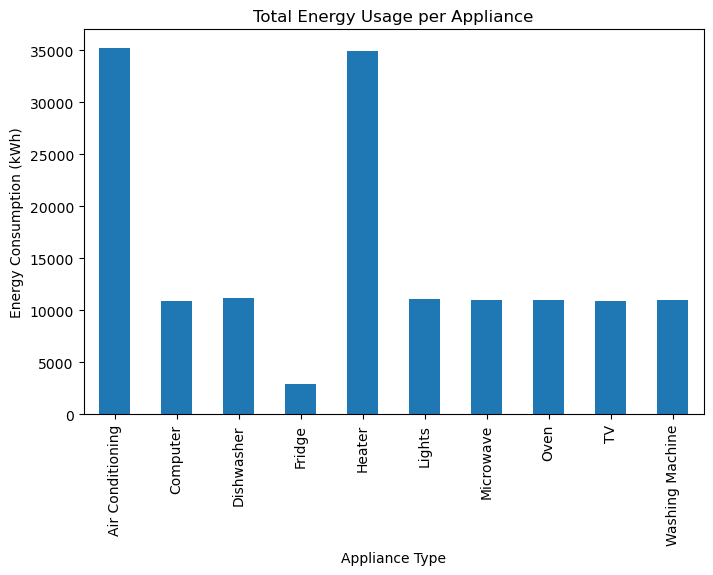

In [13]:
#Total Energy Usage per Device
device_energy = df.groupby('Appliance Type')['Energy Consumption (kWh)'].sum()

device_energy.plot(kind='bar', figsize=(8,5))
plt.title('Total Energy Usage per Appliance')
plt.xlabel('Appliance Type')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


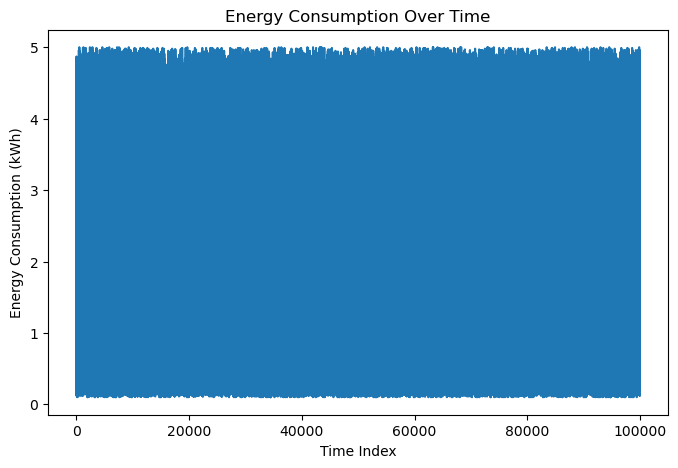

In [14]:
#Energy Usage Over Time
plt.figure(figsize=(8,5))
plt.plot(df['Energy Consumption (kWh)'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Time Index')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


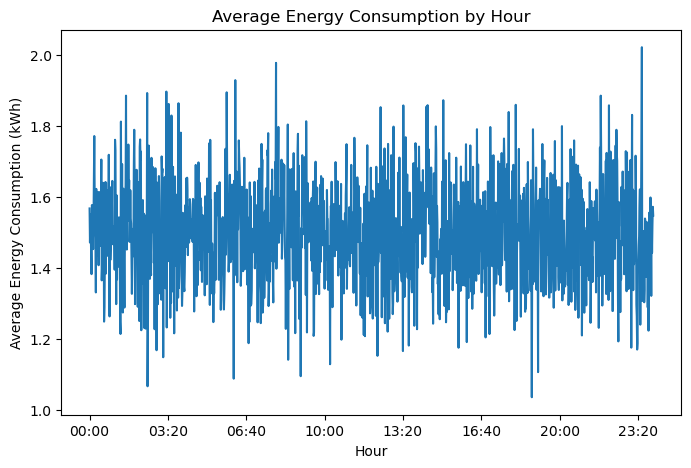

In [15]:
#Identify Peak Usage Hours
hourly_energy = df.groupby('Time')['Energy Consumption (kWh)'].mean()

hourly_energy.plot(figsize=(8,5))
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()


In [16]:
'''One row per appliance
Total energy consumed by each appliance
This helps identify high energy-consuming devices'''
device_group = df.groupby('Appliance Type')['Energy Consumption (kWh)'].sum()
device_group


Appliance Type
Air Conditioning    35233.06
Computer            10893.63
Dishwasher          11138.51
Fridge               2961.97
Heater              34930.78
Lights              11092.12
Microwave           10951.26
Oven                10963.51
TV                  10867.97
Washing Machine     10962.35
Name: Energy Consumption (kWh), dtype: float64

<Axes: title={'center': 'Energy Consumption by Appliance'}, xlabel='Appliance Type'>

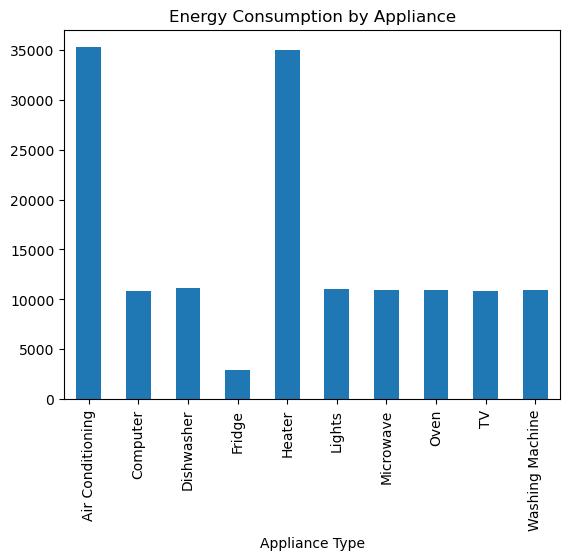

In [17]:
device_group.plot(kind='bar', title='Energy Consumption by Appliance')


In [18]:
#Total energy consumed per day
daily_energy = df.groupby('Date')['Energy Consumption (kWh)'].sum()
daily_energy.head()


Date
2023-01-01    466.40
2023-01-02    401.01
2023-01-03    375.64
2023-01-04    454.80
2023-01-05    460.98
Name: Energy Consumption (kWh), dtype: float64

In [19]:
#Average energy consumption per hour
hourly_energy = df.groupby('Time')['Energy Consumption (kWh)'].mean()
hourly_energy.head()


Time
00:00    1.568308
00:01    1.472121
00:02    1.552254
00:03    1.488214
00:04    1.441714
Name: Energy Consumption (kWh), dtype: float64